In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


"The coalescent-based analysis performed by G-PhoCS assumes the input alignments represent a set of pu- tative “neutral loci” in which recombination occurred at negligible rates during the sample history, and between which recombination occurred at sufficiently high rates that the genealogies are approximately un- correlated"  http://www.nature.com.ezp-prod1.hul.harvard.edu/ng/journal/v43/n10/extref/ng.937-S1.pdf

In [51]:
def get_non_X_elements(human_nucl, chimp_nucl):
   # if (human_nucl == 'X' or chimp_nucl == 'X' \
   #     or human_nucl == '?' or chimp_nucl == '?'\
   #     or human_nucl == 'N' or chimp_nucl == 'N'\
   #    or human_nucl == '\n' or chimp_nucl == '\n'):
    if (human_nucl not in ['a','t','c','g','A','T','C','G'] or chimp_nucl not in ['a','t','c','g','A','T','C','G']):
        return False
    else:
        return True


In [77]:
cutoff = 833 #93 #833 is between 1 and 2
first_genome = 1 #5
second_genome = 2 #7

neutralLoci7Genomes = open("../../Downloads/neutralLoci-7genomes.txt", "r")

#a = neutralLoci7Genomes.readlines()

d={}

neutralLoci7Genomes.readline()
a = neutralLoci7Genomes.readline()

#['sjk', 'hanChinese', 'venter', 'na12891', 'na18507', 'abt', 'kb1', 'chimp'] are the different values
#We choose to keep sjk and hanChinese
l=[]

cuffott = 1000
while a:
    a = [neutralLoci7Genomes.readline() for i in range(10)]
    #d[a[0].strip('\n')] = [ele.split('\t')[0] for ele in a[1:-1]]
    try:
        d[a[0].strip('\n')] = [ele.split('\t')[1] for ele in a[1:3]]
    except:
        print a
        break
    
    is_ele_non_X = [get_non_X_elements(ele1,ele2) for ele1, ele2 in zip(a[first_genome].split('\t')[1],a[second_genome].split('\t')[1])]
    
    sjk_no_X = [ele1.lower() for ele1, is_nuc_non_X in zip(a[first_genome].split('\t')[1], is_ele_non_X) if is_nuc_non_X]
    hanChinese_no_X = [ele1.lower() for ele1, is_nuc_non_X in zip(a[second_genome].split('\t')[1], is_ele_non_X) if is_nuc_non_X]
    
    if len(sjk_no_X) < cuffott:
        cuffott = len(sjk_no_X)
    
    l.append(sum([ele1!=ele2 for ele1, ele2 in zip(sjk_no_X[:cutoff], hanChinese_no_X[:cutoff])]))

    #print [ele.split('\t')[0] for ele in a[1:-1]]

#pd.DataFrame.from_dict(d)
cuffott

['', '', '', '', '', '', '', '', '', '']


834

(array([  3.55510000e+04,   1.49500000e+03,   3.64000000e+02,
          1.09000000e+02,   3.30000000e+01,   1.60000000e+01,
          4.00000000e+00,   2.00000000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

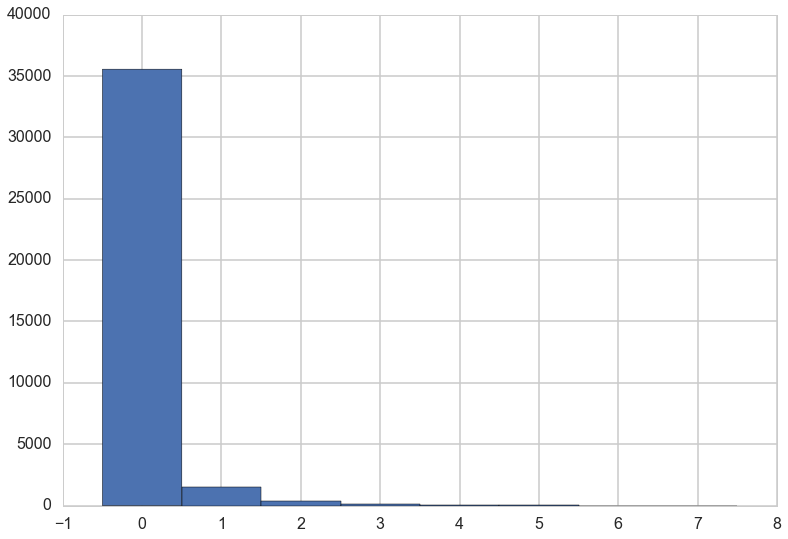

In [78]:
#plt.hist(l, bins = 20)
plt.hist(l, np.arange(min(l)-0.5, max(l)+1.5)) 

In [66]:
neutralLoci7Genomes.close()

In [69]:
minPt = min(l)
maxPt = max(l)
print minPt, maxPt, 'minPt', 'maxPt'
mx = {i:l.count(i) for i in range(minPt, maxPt +1)}


0 7 minPt maxPt


{0: 35551, 1: 1495, 2: 364, 3: 109, 4: 33, 5: 16, 6: 4, 7: 2}

In [70]:
mx.values()

[35551, 1495, 364, 109, 33, 16, 4, 2]